# Sales Data Analysis with Pandas and Seaborn
## Final project for CFG Class: Introduction to Python & Apps
#### Author: Julia Bunescu
---

## Required Tasks

A program that reads a csv file containing sales data, carry out basic analysis of the data, and write the results of the analysis to a csv file.

In [5]:
import csv
from pprint import pprint
from functools import partial

pprint = partial(pprint, sort_dicts=False)

def get_csv_data():
    csv_data = []
     
    with open('sales.csv','r') as file:
        spreadsheet = csv.DictReader(file)
        for row in spreadsheet:
            csv_data.append(row)
    return csv_data 

def get_mothly_sales(data):
    all_sales_visual = []
    all_sales = []
    for row in data:
        month = row['month']
        month_sales = int(row['sales']) 
        moth_sales_pair = {}
        moth_sales_pair[month] = month_sales
        all_sales_visual.append(moth_sales_pair)
        all_sales.append(month_sales)
    return all_sales_visual, all_sales

def get_total_sales(monthly_sales):
    return sum(monthly_sales)


def run():
    data = get_csv_data()
    print('All the csv data: ')
    pprint(data)
    [monthly_sales_visual, monthly_sales] = get_mothly_sales(data)
    print('Sales per month:')
    pprint(monthly_sales_visual)
    total_sales = get_total_sales(monthly_sales)
    print('Total sales: {}'.format(total_sales))


run()
    

All the csv data: 
[{'year': '2018', 'month': 'jan', 'sales': '6226', 'expenditure': '3808'},
 {'year': '2018', 'month': 'feb', 'sales': '1521', 'expenditure': '3373'},
 {'year': '2018', 'month': 'mar', 'sales': '1842', 'expenditure': '3965'},
 {'year': '2018', 'month': 'apr', 'sales': '2051', 'expenditure': '1098'},
 {'year': '2018', 'month': 'may', 'sales': '1728', 'expenditure': '3046'},
 {'year': '2018', 'month': 'jun', 'sales': '2138', 'expenditure': '2258'},
 {'year': '2018', 'month': 'jul', 'sales': '7479', 'expenditure': '2084'},
 {'year': '2018', 'month': 'aug', 'sales': '4434', 'expenditure': '2799'},
 {'year': '2018', 'month': 'sep', 'sales': '3615', 'expenditure': '1649'},
 {'year': '2018', 'month': 'oct', 'sales': '5472', 'expenditure': '1116'},
 {'year': '2018', 'month': 'nov', 'sales': '7224', 'expenditure': '1431'},
 {'year': '2018', 'month': 'dec', 'sales': '1812', 'expenditure': '3532'}]
Sales per month:
[{'jan': 6226},
 {'feb': 1521},
 {'mar': 1842},
 {'apr': 2051},


## Extending the Project

C:\Users\iulia\AppData\Local\Temp\ipykernel_18976\4170265872.py:196: UserWarning: 
The palette list has fewer values (9) than needed (12) and will cycle, which may produce an uninterpretable plot.
  plot = sns.lineplot( data = pc_games_2000, x="Year", y='Global_Sales', hue = 'Genre',palette = palette, errorbar =None)


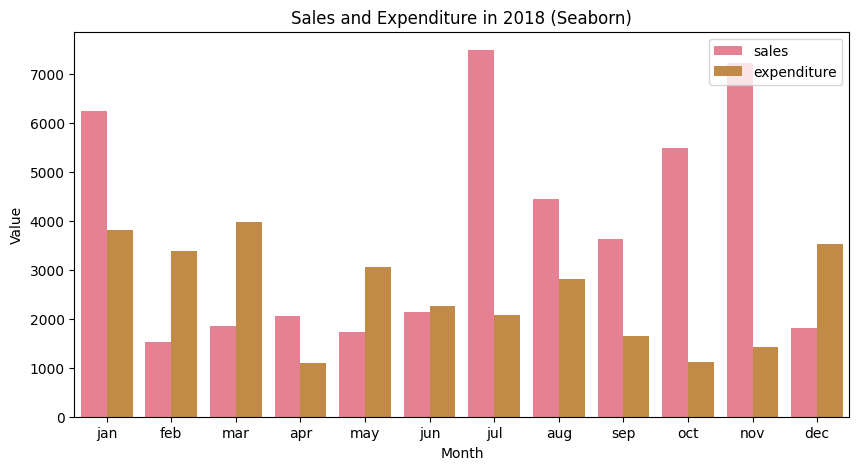

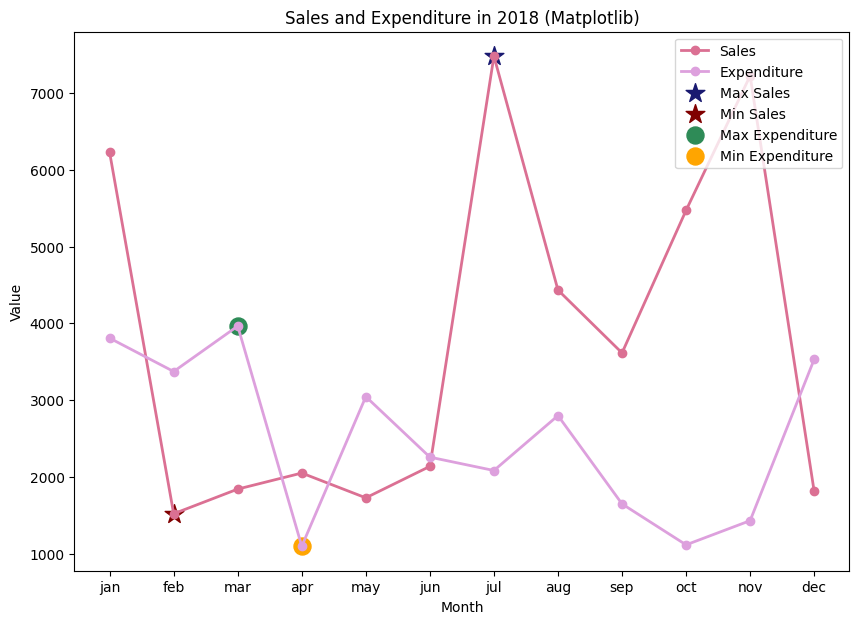

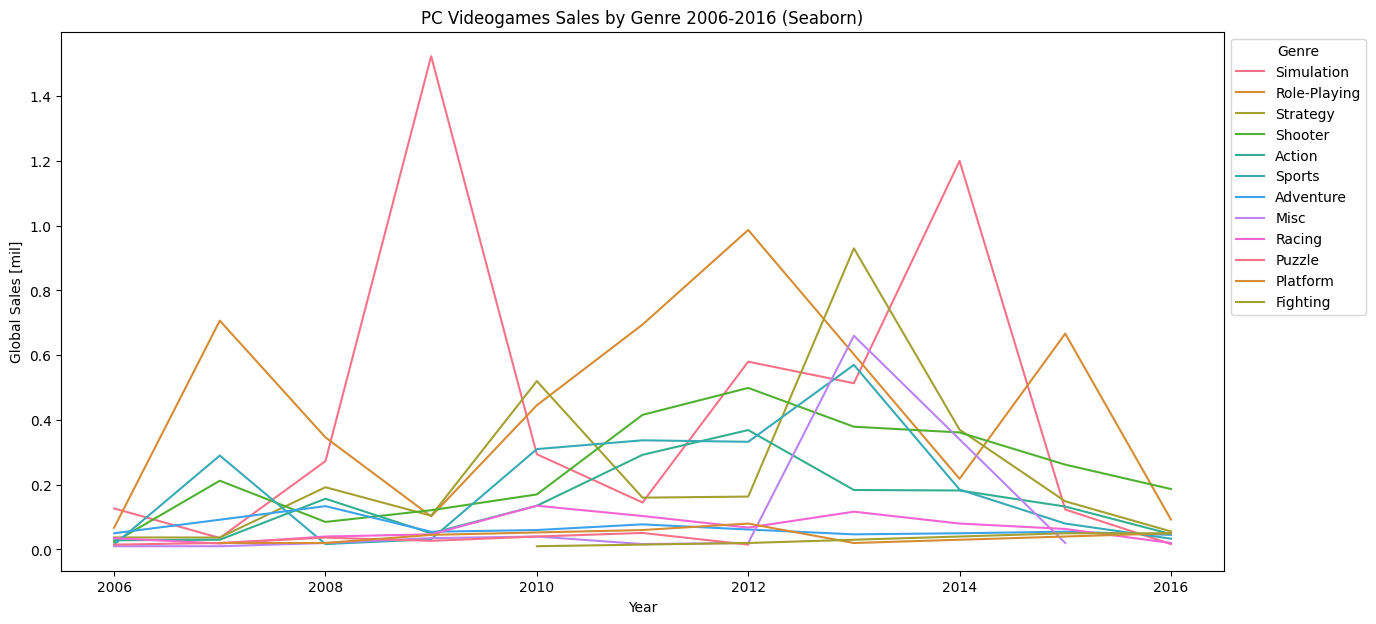

In [9]:
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pprint import pprint
from functools import partial
from datetime import datetime

# Make sure the data is not ordered alphabetically when it it printed in the console
pprint = partial(pprint, sort_dicts=False)

# # Read the data from the csv using csv lib
# def get_csv_data():
#     csv_data = []
     
#     with open('sales.csv','r') as file:
#         spreadsheet = csv.DictReader(file)

#         for row in spreadsheet:
#             csv_data.append(row)

#     return csv_data 

# # Return  monthly sales as a dictionary
def get_mothly_sales(data):
    all_sales = {}

    for row in data:
        month = row['month']
        month_sales = int(row['sales']) 
        all_sales[month] = month_sales
        
    return all_sales

# Return the sum of the total sales
def get_total_sales(monthly_sales):
    values = list(monthly_sales.values())
    return sum(values)

# # Prin the data nicley in the console 
# def print_data(message, data):
#     print(message)

#     if isinstance(data, list) or isinstance(data, dict):
#         pprint(data)
#     else:
#         print(data)

## Starated using Pandas ##

# Change the data from wide to long,
# read the csv using Pandas lib,
# remove 'year' column
def prepare_dataset(csv):
    data = pd.read_csv(csv)

    data.pop('year')
    data_clean = data.melt('month', var_name='columns', value_name='values')

    return data_clean


# Display data using seaborn library
def display_spreadsheet_data(csv):
    data_clean = prepare_dataset(csv)

    plt.figure()
    
    palette = sns.color_palette("husl", 9)

    plot = sns.barplot( data = data_clean, x="month", y="values", hue='columns', palette = palette)
    plot.set(title='Sales and Expenditure in 2018 (Seaborn)', xlabel="Month", ylabel="Value")
    plt.legend(loc='upper right')
    plt.gcf().set_size_inches(10, 5)
    
# Display data using matplot lib
# Also display min and max for both sales and expenditure
def display_min_max(csv):   
    data = pd.read_csv(csv)

    data.pop('year')
    data_clean = data.melt('month', var_name='columns', value_name='values')

    sales = data_clean[data_clean.values == 'sales']
    expenditure = data_clean[data_clean.values == 'expenditure']

    fig, ax = plt.subplots()
    fig.set_size_inches(10, 7)

    ax.plot(sales['month'], sales['values'], label='Sales', color = 'palevioletred', lw = 2, marker="o")
    ax.plot(sales['month'], expenditure['values'], label='Expenditure', color = 'plum', lw = 2, marker="o")

    max_sales = sales[sales["values"] == sales['values'].max()]
    max_expenditure = expenditure[expenditure["values"] == expenditure['values'].max()]

    min_sales = sales[sales["values"] == sales['values'].min()]
    min_expenditure = expenditure[expenditure["values"] == expenditure['values'].min()]

    ax.scatter(max_sales["month"], max_sales["values"], marker="*", label="Max Sales", facecolor="midnightblue",  s=200)
    ax.scatter(min_sales["month"], min_sales["values"], marker="*", label="Min Sales", facecolor="maroon", s= 200)

    ax.scatter(max_expenditure["month"], max_expenditure["values"], marker="o", label="Max Expenditure", facecolor="seagreen",  s=150)
    ax.scatter(min_expenditure["month"], min_expenditure["values"], marker="o", label="Min Expenditure", facecolor="orange",  s=150)

    ax.set_xlabel("Month")
    ax.set_ylabel("Value")
    ax.set_title("Sales and Expenditure in 2018 (Matplotlib)")
    ax.legend(loc='upper right')


# Print min and max for both sales and expenditure
def print_max_min_to_file(csv):
    data = pd.read_csv(csv)

    data.pop('year')

    max_sales = data.nlargest(1,['sales'])
    max_sales.pop('expenditure')
    min_sales =  data.nsmallest(1,['sales'])
    min_sales.pop('expenditure')

    max_exp = data.nlargest(1,['expenditure'])
    max_exp.pop('sales')
    min_exp =  data.nsmallest(1,['expenditure'])
    min_exp.pop('sales')

    print_to_log_file('Min values: \n{} \n {}'.format( min_sales, min_exp))
    print_to_log_file('Max values: \n{} \n {}'.format(max_sales, max_exp))


#log activity into file
def print_to_log_file(*messages):
    with open('Log.txt','a+') as file:

        now = datetime.now()
        dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
        file.write("\n" + dt_string + ':')
        for message in messages:
            if isinstance(message, list) or isinstance(message, dict):
                pprint(message, stream = file)
            else:
                contents = '\n' + str(message)
                file.write(contents)

# Add a new column to the csv file: changes per monthly sales and expenditures
def create_monthly_changes(csv):
    csv_data = pd.read_csv(csv)

    monthly_changes_sales = []
    monthly_changes_expend = []

    sales = csv_data['sales']
    expenditure = csv_data['expenditure']

    prev_month_sales = sales[0]
    prev_month_expend = expenditure[0]


    for sale in sales:
        cur_month_sales = sale 
        change_percent = int((cur_month_sales / prev_month_sales - 1) * 100)

        monthly_changes_sales.append(change_percent)

        prev_month_sales = cur_month_sales

    csv_data['Change in sales [%]'] = monthly_changes_sales

    for expen in expenditure:
        cur_month_expend = expen 
        change_percent = int((cur_month_expend / prev_month_expend - 1) * 100)

        monthly_changes_expend.append(change_percent)

        prev_month_expend = cur_month_expend

    csv_data['Change in expenditure [%]'] = monthly_changes_expend

    return csv_data

# write data into a scv file
def write_to_csv(csv_file, scv_data):
    with open(csv_file, '+w') as file:
        scv_data.to_csv(csv_file, index=False)

#display pc videogames sales 2006-2016
def display_pc_videogames_sales():
    vg_sales_data = pd.read_csv('vgsales.csv')
    
    plt.figure()
    
    pc_games = vg_sales_data[vg_sales_data.Platform == 'PC']
    pc_games_2000 = pc_games[pc_games.Year >= 2006]
    palette = sns.color_palette("husl", 9)

    plot = sns.lineplot( data = pc_games_2000, x="Year", y='Global_Sales', hue = 'Genre',palette = palette, errorbar =None)
    plot.set(title='PC Videogames Sales by Genre 2006-2016 (Seaborn)', xlabel="Year", ylabel="Global Sales [mil]")
    sns.move_legend(plot, loc = "upper left", bbox_to_anchor=(1, 1))
    plt.gcf().set_size_inches(15, 7)

        
# Main funciton
def run():
    ## 'sales.csv' ##
    #read csv data using csv lib
    data = get_csv_data()
    
    #print to log file
    print_to_log_file('All the csv data: ', data)

    #plot csv data to console
    display_spreadsheet_data('sales.csv')

    #print csv data to log file
    print_max_min_to_file('sales.csv')

    # started using pandas
    #create plot of the csv data with highlighted min and max values 
    display_min_max('sales.csv')

    #extract from data only the monthly sales
    monthly_sales = get_mothly_sales(data)

    #print extracted data to log file
    print_to_log_file('Sales per month:', monthly_sales)
  
    #compute total sales 
    total_sales = get_total_sales(monthly_sales)

    #print to log file
    print_to_log_file('Total sales:',  total_sales)

    #create two new columns representing monthly sales and expenditure changes in %  and add them to existing data
    data = create_monthly_changes('sales.csv')
    #write e new csv file using the new data 
    write_to_csv('new_sales.csv', data)

    ## 'vgsales.csv' ##
    display_pc_videogames_sales()


run()
    